In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
#from IPython.core.interactiveshell import InteractiveShell  
#InteractiveShell.ast_node_interactivity = "all" ##한 번에 모든 결과 표시
#InteractiveShell.ast_node_interactivity = "last" ##마지막 결과만 출력

In [2]:
pwd

'C:\\Users\\YUHA\\Desktop\\DScover\\사회2조 final project'

In [3]:
df=pd.read_csv('data/dataset2.csv', encoding='CP949', low_memory=False)

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
df.head(2)

,id,conversation_id,created_at,date,time,user_id,username,name,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link,quote_url,video,thumbnail,tweet_len,nick_len,nick_count_Q,tweet_count_Q,tweet_count_space,space_div_len,last_word,search_word,noun_div_pos,y
0,1.380000e+18,1.380000e+18,2021-04-08 02:56:52 대한민국 표준시,2021-04-08,2:56:52,7.150000e+17,beominlove,김은경,권혜강남 완도선릉셔츠룸 천락셔츠룸 무안레깅스 광주대전울산제주 궁류오피스타 서득오피가이드 장성룸싸롱 세종경기강원강남 건대란제리룸 서울부산대구인천 영광노브라셔츠룸 봉수셔츠룸 함평란제리노래방 edge52937 https://t.co/lPpoxwjGup,ko,[],[],['https://pbs.twimg.com/media/EyY7dMIVEAIp79T.jpg'],0,0,0,[],https://twitter.com/beominlove/status/1379855710868054017,[],1,https://pbs.twimg.com/media/EyY7dMIVEAIp79T.jpg,138,3,0,0,16,0.116,1,란제리노래방,0.836735,1
1,1.380000e+18,1.380000e+18,2021-04-14 22:57:27 대한민국 표준시,2021-04-14,22:57:27,1.200000e+18,v31vzx7nnhqsr3n,ha_sung,육변기 자지 여자온플 질싸 후장입싸 상암선물포장 합정선물포장 마포선물포장 공방 선물포장 연남동선물포장 신촌선물포장 오피가이드 노브라셔츠룸 란제리노래방 오피스타 슈퍼스타셔츠룸코로나 란제리룸 e8heMx5B https://t.co/Ha8oCGEKfr,ko,[],[],['https://pbs.twimg.com/media/Ey8HyZEVEAYVkxx.jpg'],0,0,0,[],https://twitter.com/v31Vzx7nNHqSR3n/status/1382332175689781250,[],1,https://pbs.twimg.com/media/Ey8HyZEVEAYVkxx.jpg,138,7,0,0,20,0.145,0,란제리노래방,0.740741,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213284 entries, 0 to 213283
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 213284 non-null  float64
 1   conversation_id    213284 non-null  float64
 2   created_at         213284 non-null  object 
 3   date               213284 non-null  object 
 4   time               213284 non-null  object 
 5   user_id            213284 non-null  float64
 6   username           213284 non-null  object 
 7   name               213284 non-null  object 
 8   tweet              213284 non-null  object 
 9   language           213284 non-null  object 
 10  mentions           213284 non-null  object 
 11  urls               213284 non-null  object 
 12  photos             213284 non-null  object 
 13  replies_count      213284 non-null  int64  
 14  retweets_count     213284 non-null  int64  
 15  likes_count        213284 non-null  int64  
 16  ha

### 일반 트윗과 구분되는 성매매 관련 트윗의 특성
- [x] 시간대별 트윗 개수
- [x] 멘션, url, 사진, 해시태그, 영상 여부 (파이차트)
- [x] count, len 차이

### 컬러 팔레트 참고
https://color.adobe.com/ko/create/color-wheel

In [6]:
#한글을 plot에 나타내기 위해 사용할 한글 폰트를 불러와서 적용
from matplotlib import font_manager,rc
import matplotlib
font_path='C:/Windows/Fonts/malgun.ttf' #폰트의 위치
font_name=font_manager.FontProperties(fname=font_path).get_name() #폰트의 이름
matplotlib.rc('font',family=font_name) #한글 폰트 적용

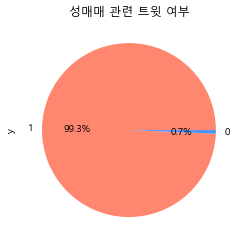

In [7]:
df['y'].value_counts().plot(kind='pie',autopct='%1.1f%%', title='성매매 관련 트윗 여부', colors=['#FF8770','#4994FC'])

In [160]:
df['y'].value_counts()

1    211868
0      1416
Name: y, dtype: int64

In [8]:
#time열 datetime으로 데이터 타입 변경
df['time']=pd.to_datetime(df['time'], format='%H:%M:%S')

In [9]:
#time중 hour만 추출
hour0=[df['time'][i].hour for i in range(len(df)) if df['y'][i]==0]
hour1=[df['time'][i].hour for i in range(len(df)) if df['y'][i]==1]

C:\Users\YUHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\YUHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


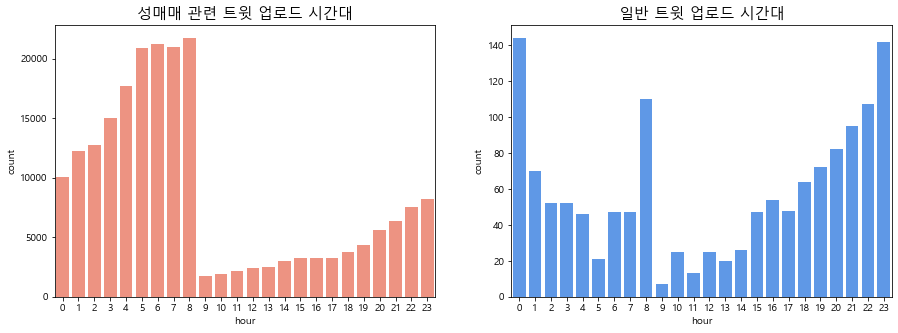

In [10]:
fig = plt.figure(figsize=(15,5))

area01 = fig.add_subplot(1, 2, 1)
area01.set_xticks(range(0,24,1))
area01.set_xlabel('hour')
area01.set_title('성매매 관련 트윗 업로드 시간대', fontdict={'fontsize':15})

area02 = fig.add_subplot(1, 2, 2)
area02.set_xticks(range(0,24,1))
area02.set_xlabel('hour')
area02.set_title('일반 트윗 업로드 시간대', fontdict={'fontsize':15})

sns.countplot(hour1, ax=area01, color='#FF8770')
sns.countplot(hour0, ax=area02, color='#4994FC')

In [11]:
#date열 datetime으로 데이터 타입 변경
df['date']=pd.to_datetime(df['date'], format='%Y-%m-%d')

In [12]:
#date중 요일만 추출하여 요일 열 추가
'''weekday=['MON','TUE','WED','THU','FRI','SAT','SUN']

weekday0=[weekday[df['date'][i].weekday()] for i in range(len(df)) if df['y'][i]==0]
weekday1=[weekday[df['date'][i].weekday()] for i in range(len(df)) if df['y'][i]==1]'''

"weekday=['MON','TUE','WED','THU','FRI','SAT','SUN']\n\nweekday0=[weekday[df['date'][i].weekday()] for i in range(len(df)) if df['y'][i]==0]\nweekday1=[weekday[df['date'][i].weekday()] for i in range(len(df)) if df['y'][i]==1]"

In [13]:
weekday=['MON','TUE','WED','THU','FRI','SAT','SUN']
list=[]
for i in range(len(df)):
    list.append(weekday[df['date'][i].weekday()])
df['weekday']=list

In [14]:
df['weekday']=df['weekday'].astype('category')
df['weekday'].cat.set_categories(weekday, ordered=True, inplace=True)

In [15]:
df.weekday.unique()

[THU, WED, FRI, SAT, SUN, MON, TUE]
Categories (7, object): [MON < TUE < WED < THU < FRI < SAT < SUN]

C:\Users\YUHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


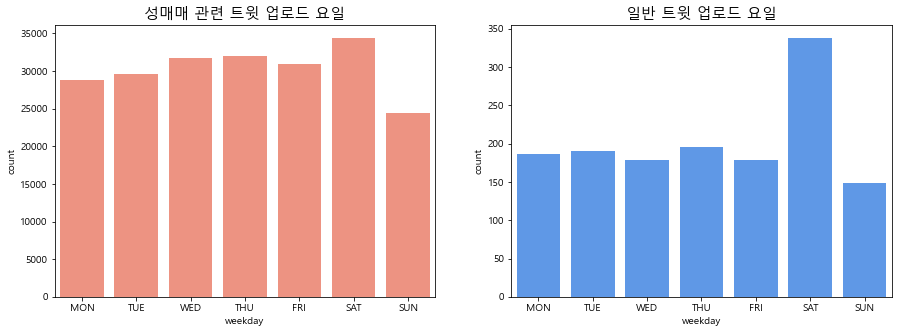

In [16]:
fig = plt.figure(figsize=(15,5))

area01 = fig.add_subplot(1, 2, 1)
area01.set_title('성매매 관련 트윗 업로드 요일', fontdict={'fontsize':15})

area02 = fig.add_subplot(1, 2, 2)
area02.set_title('일반 트윗 업로드 요일', fontdict={'fontsize':15})

sns.countplot(df[df['y']==1]['weekday'], ax=area01, color='#FF8770')
sns.countplot(df[df['y']==0]['weekday'], ax=area02, color='#4994FC')

In [17]:
#mentions열에 값이 있으면 1, 없으면 0
list=[]
for i in range(len(df)):
    if df['mentions'][i]=='[]':
        list.append(0)
    else:
        list.append(1)
df['mentions']=list

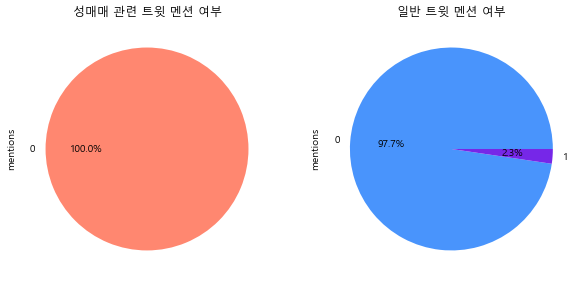

In [18]:
#가로 10, 세로 5 인치의 백지 생성
plt.figure(figsize=(10,5))

#백지를 1행 2열 공간으로 나누고 첫번째 자리에 mentions 값에 따라 파이 차트를 그림
plt.subplot(1,2,1)
df[df['y']==1]['mentions'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='성매매 관련 트윗 멘션 여부', colors=['#FF8770', '#E82827'])

plt.subplot(1,2,2)
df[df['y']==0]['mentions'].value_counts().plot(kind='pie',autopct='%1.1f%%', title='일반 트윗 멘션 여부', colors=['#4994FC', '#7627E8'])

In [19]:
#urls열에 값이 있으면 1, 없으면 0
list=[]
for i in range(len(df)):
    if df['urls'][i]=='[]':
        list.append(0)
    else:
        list.append(1)
df['urls']=list

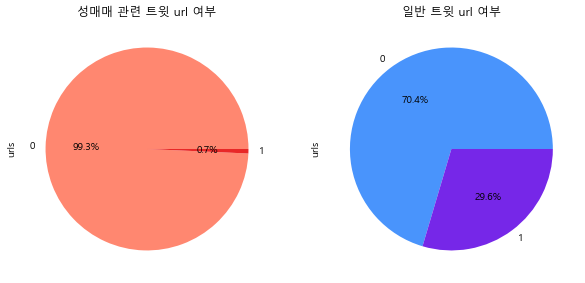

In [20]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
df[df['y']==1]['urls'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='성매매 관련 트윗 url 여부', colors=['#FF8770', '#E82827'])

plt.subplot(1,2,2)
df[df['y']==0]['urls'].value_counts().plot(kind='pie',autopct='%1.1f%%', title='일반 트윗 url 여부', colors=['#4994FC', '#7627E8'])

In [21]:
#photos열에 값이 있으면 1, 없으면 0
list=[]
for i in range(len(df)):
    if df['photos'][i]=='[]':
        list.append(0)
    else:
        list.append(1)
df['photos']=list

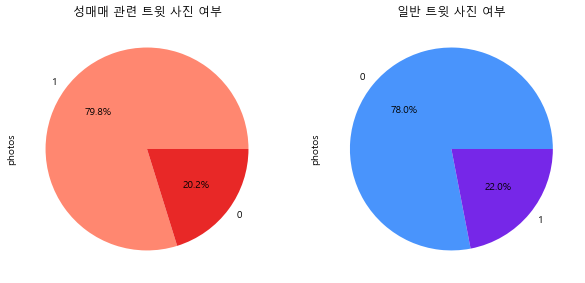

In [22]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
df[df['y']==1]['photos'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='성매매 관련 트윗 사진 여부', colors=['#FF8770', '#E82827'])

plt.subplot(1,2,2)
df[df['y']==0]['photos'].value_counts().plot(kind='pie',autopct='%1.1f%%', title='일반 트윗 사진 여부', colors=['#4994FC', '#7627E8'])

In [23]:
#hashtags열에 값이 있으면 1, 없으면 0
list=[]
for i in range(len(df)):
    if df['hashtags'][i]=='[]':
        list.append(0)
    else:
        list.append(1)
df['hashtags']=list

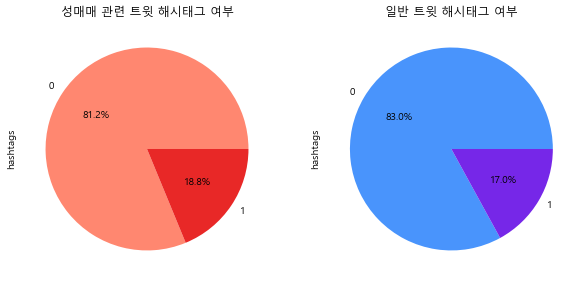

In [24]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
df[df['y']==1]['hashtags'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='성매매 관련 트윗 해시태그 여부', colors=['#FF8770', '#E82827'])

plt.subplot(1,2,2)
df[df['y']==0]['hashtags'].value_counts().plot(kind='pie',autopct='%1.1f%%', title='일반 트윗 해시태그 여부', colors=['#4994FC', '#7627E8'])

In [25]:
#video열 값 수정 필요
df.video.value_counts()

1        167055
0         43838
False      2139
True        252
Name: video, dtype: int64

In [26]:
df.replace({'video': {'True':1, 'False':0}}, inplace=True)

df['video']=df['video'].astype(int)

df.video.value_counts()

1    167307
0     45977
Name: video, dtype: int64

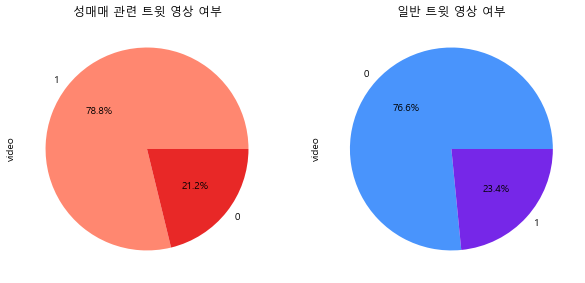

In [27]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
df[df['y']==1]['video'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='성매매 관련 트윗 영상 여부', colors=['#FF8770', '#E82827'])

plt.subplot(1,2,2)
df[df['y']==0]['video'].value_counts().plot(kind='pie',autopct='%1.1f%%', title='일반 트윗 영상 여부', colors=['#4994FC', '#7627E8'])

In [28]:
#thumbnail열에 값이 있으면 1, 없으면 0
list=[]
for i in range(len(df)):
    if df['thumbnail'][i]=='[]':
        list.append(0)
    else:
        list.append(1)
df['thumbnail']=list

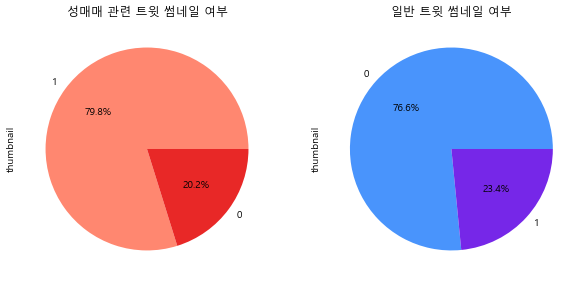

In [29]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
df[df['y']==1]['thumbnail'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='성매매 관련 트윗 썸네일 여부', colors=['#FF8770', '#E82827'])

plt.subplot(1,2,2)
df[df['y']==0]['thumbnail'].value_counts().plot(kind='pie',autopct='%1.1f%%', title='일반 트윗 썸네일 여부', colors=['#4994FC', '#7627E8'])

In [30]:
#last_word 열 값 수정 필요
df.last_word.value_counts()

1        158097
0         52796
False      2024
True        367
Name: last_word, dtype: int64

In [31]:
#last_word 데이터 타입 정리
df.replace({'last_word': {'True':1, 'False':0}}, inplace=True)

df['last_word']=df['last_word'].astype(int)

df.last_word.value_counts()

1    158464
0     54820
Name: last_word, dtype: int64

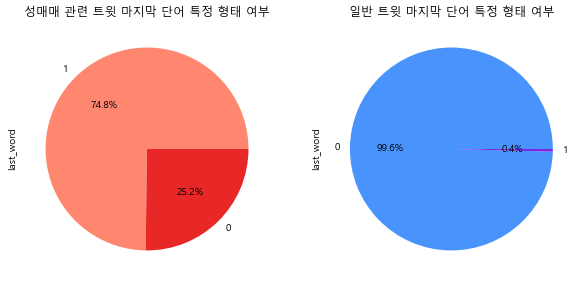

In [32]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
df[df['y']==1]['last_word'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='성매매 관련 트윗 마지막 단어 특정 형태 여부', colors=['#FF8770', '#E82827'])

plt.subplot(1,2,2)
df[df['y']==0]['last_word'].value_counts().plot(kind='pie',autopct='%1.1f%%', title='일반 트윗 마지막 단어 특정 형태 여부', colors=['#4994FC', '#7627E8'])

In [33]:
#이상치 처리 과정에서 사라진 건가???
df['replies_count'].sum()

0

C:\Users\YUHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\YUHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


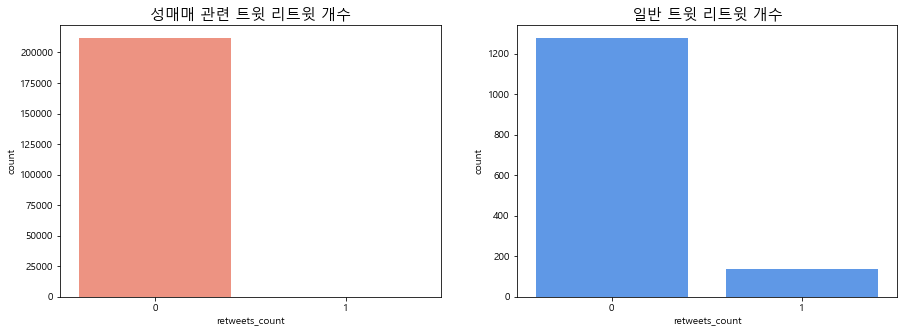

In [34]:
fig = plt.figure(figsize=(15,5))

area01 = fig.add_subplot(1, 2, 1)
area01.set_title('성매매 관련 트윗 리트윗 개수', fontdict={'fontsize':15})

area02 = fig.add_subplot(1, 2, 2)
area02.set_title('일반 트윗 리트윗 개수', fontdict={'fontsize':15})

sns.countplot(df[df['y']==1]['retweets_count'], ax=area01, color='#FF8770')
sns.countplot(df[df['y']==0]['retweets_count'], ax=area02, color='#4994FC')

C:\Users\YUHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\YUHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


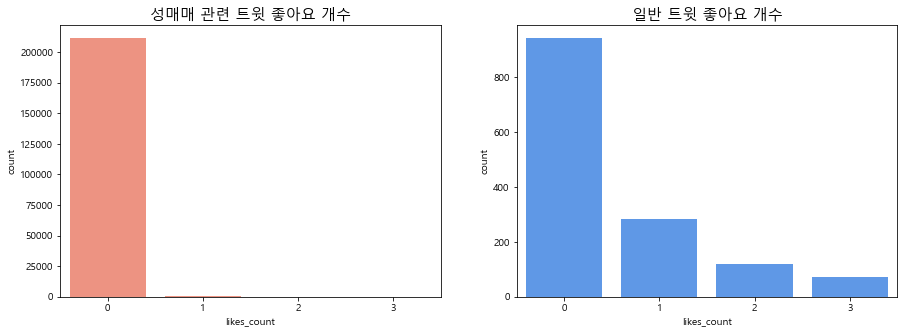

In [35]:
fig = plt.figure(figsize=(15,5))

area01 = fig.add_subplot(1, 2, 1)
area01.set_title('성매매 관련 트윗 좋아요 개수', fontdict={'fontsize':15})

area02 = fig.add_subplot(1, 2, 2)
area02.set_title('일반 트윗 좋아요 개수', fontdict={'fontsize':15})

sns.countplot(df[df['y']==1]['likes_count'], ax=area01, color='#FF8770')
sns.countplot(df[df['y']==0]['likes_count'], ax=area02, color='#4994FC')

C:\Users\YUHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\YUHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


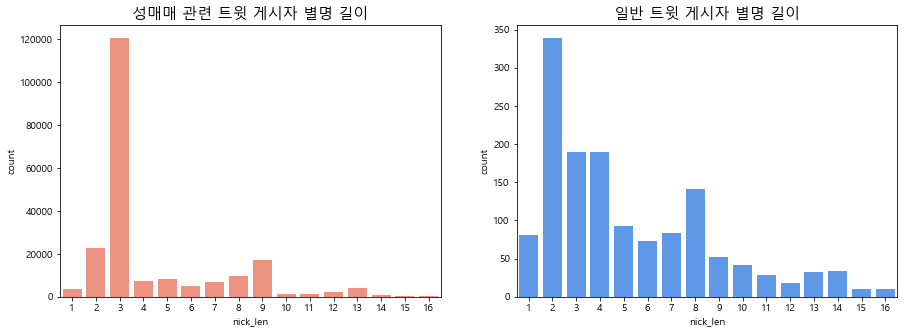

In [37]:
fig = plt.figure(figsize=(15,5))

area01 = fig.add_subplot(1, 2, 1)
area01.set_title('성매매 관련 트윗 게시자 별명 길이', fontdict={'fontsize':15})

area02 = fig.add_subplot(1, 2, 2)
area02.set_title('일반 트윗 게시자 별명 길이', fontdict={'fontsize':15})

sns.countplot(df[df['y']==1]['nick_len'], ax=area01, color='#FF8770')
sns.countplot(df[df['y']==0]['nick_len'], ax=area02, color='#4994FC')

In [52]:
df[(df['y']==1)&(df['nick_len']==3)].name[0:20]

0     김은경
4     이성호
8     김소희
9     김녹연
10    이성호
14    아라레
18    김해니
19    최예민
22    장서현
23    김혜빈
24    장수은
26    서혜원
27    장수은
29    서혜원
30    엄선혜
31    아라레
32    아라레
33    김혜빈
34    장서현
36    김선경
Name: name, dtype: object

In [53]:
df[(df['y']==0)&(df['nick_len']==2)].name[0:20]

209079    오소
209081    상어
209084    파이
209088    탄산
209090    이엘
209096    본비
209106    서솔
209110    파양
209111    인공
209112    율핀
209119    소요
209147    로렌
209150    헐헐
209155    반돌
209156    제리
209157    나댜
209163    닷새
209165    배빈
209169    연탄
209185    A~
Name: name, dtype: object

In [38]:
#이것도 이상치 처리 과정에서 삭제된 거로 추정...
df['nick_count_Q'].sum()

0

C:\Users\YUHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\YUHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


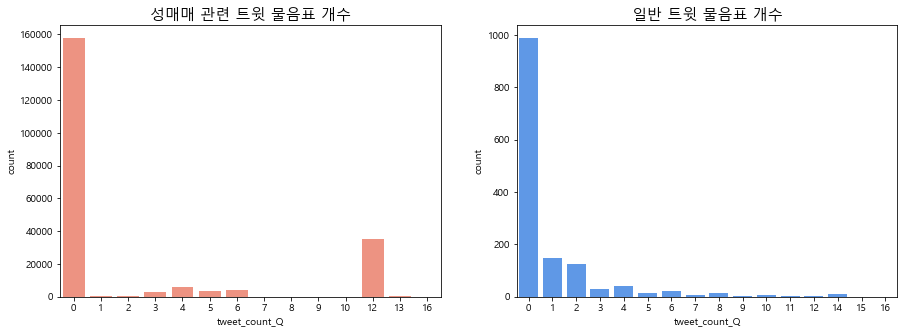

In [39]:
fig = plt.figure(figsize=(15,5))

area01 = fig.add_subplot(1, 2, 1)
area01.set_title('성매매 관련 트윗 물음표 개수', fontdict={'fontsize':15})

area02 = fig.add_subplot(1, 2, 2)
area02.set_title('일반 트윗 물음표 개수', fontdict={'fontsize':15})

sns.countplot(df[df['y']==1]['tweet_count_Q'], ax=area01, color='#FF8770')
sns.countplot(df[df['y']==0]['tweet_count_Q'], ax=area02, color='#4994FC')

In [74]:
#인코딩 오류로 이모지가 '??'로 출력됨
df[(df['y']==1)&(df['tweet_count_Q']==12)].tweet[0:10]

9477       ??가평애인대행 ??과천섹파 ??수영콜걸 ??영월안마  ??ㅋ톡 dio555??  #세종조건만남방법 #세종애인대행가격 #세종애인대행강추 #울주출장아가씨
9478     ??보은애인대행 ??영동섹파 ??옥천콜걸 ??음성안마  ??ㅋ톡 dio555??  #광산애인대행후기 #광주동구출장샵 #광주동구출장아가씨강추 #광주동구출장샵
9479               ??상주애인대행 ??영천섹파 ??영주콜걸 ??구미안마  ??ㅋ톡 dio555??  #청양콜걸샵 #청양콜걸강추 #청양조건만남 #청양애인대행
9480        ??영주애인대행 ??양평섹파 ??동두천콜걸 ??과천안마  ??ㅋ톡 tw567??  #성북구조건만남 #성북구조건만남강추 #성북조건만남강추 #성북조건만남
9494           ??고령애인대행 ??성주섹파 ??칠곡콜걸 ??예천안마  ??ㅋ톡 tw567??  #오산애인대행추천 #오산애인대행 #하남조건만남후기 #하남조건만남
9495    ??구로애인대행 ??강서섹파 ??양천콜걸 ??마포안마  ??ㅋ톡 CALL999??  #진안애인대행후기 #경남출장샵강추 #경남출장아가씨후기 #경남출장서비스추천
9496         ??고양애인대행 ??용인섹파 ??성남콜걸 ??부천안마  ??ㅋ톡 tw567??  #광진콜걸샵최고 #광진콜걸샵정보 #광진구콜걸샵후기 #광진구콜걸샵최고
9506          ??광진애인대행 ??동대문섹파 ??중랑콜걸 ??성북안마  ??ㅋ톡 dio555??  #구리시조건만남  #구리애인대행가격 #안성출장샵강추 #안성콜걸
9507           ??속초애인대행 ??삼척문섹파 ??홍천콜걸 ??횡성안마  ??ㅋ톡 dio555??  #도봉콜걸 #도봉구조건만남강추 #도봉조건만남대박 #노원출장샵
9508         ??의령애인대행 ??양산섹파 ??거제콜걸 ??밀양안마  ??ㅋ톡 dio555??  #함안출장서비스 #함안출장업소강추 #함안군콜걸샵  #함안콜걸샵강추
Name: tweet, dtype: object

C:\Users\YUHA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\YUHA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


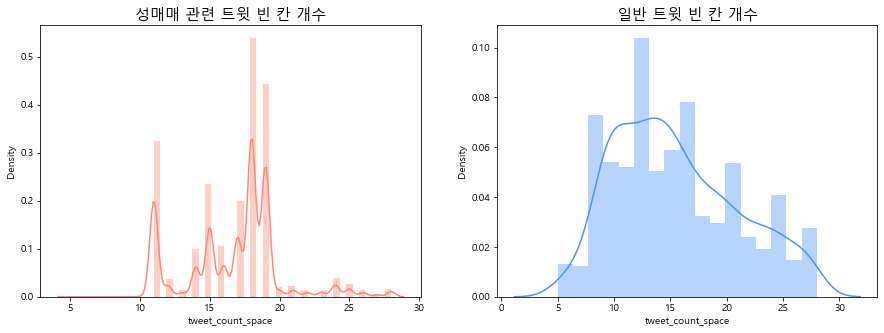

In [71]:
fig = plt.figure(figsize=(15,5))

area01 = fig.add_subplot(1, 2, 1)
area01.set_title('성매매 관련 트윗 빈 칸 개수', fontdict={'fontsize':15})

area02 = fig.add_subplot(1, 2, 2)
area02.set_title('일반 트윗 빈 칸 개수', fontdict={'fontsize':15})

sns.distplot(df[df['y']==1]['tweet_count_space'], ax=area01, color='#FF8770', kde=True)
sns.distplot(df[df['y']==0]['tweet_count_space'], ax=area02, color='#4994FC', kde=True)

Text(0.5, 1.0, '빈 칸 개수')

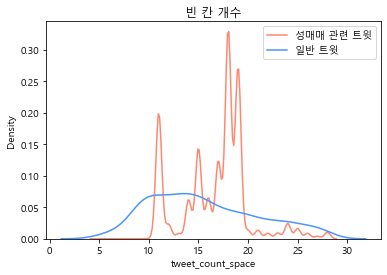

In [142]:
#커널 밀도 추정 함수로 데이터 분포 알아보기

sns.kdeplot(df[df['y']==1]['tweet_count_space'], color='#FF8770')
sns.kdeplot(df[df['y']==0]['tweet_count_space'], color='#4994FC')
plt.legend(['성매매 관련 트윗','일반 트윗'])
plt.title('빈 칸 개수')

C:\Users\YUHA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\YUHA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


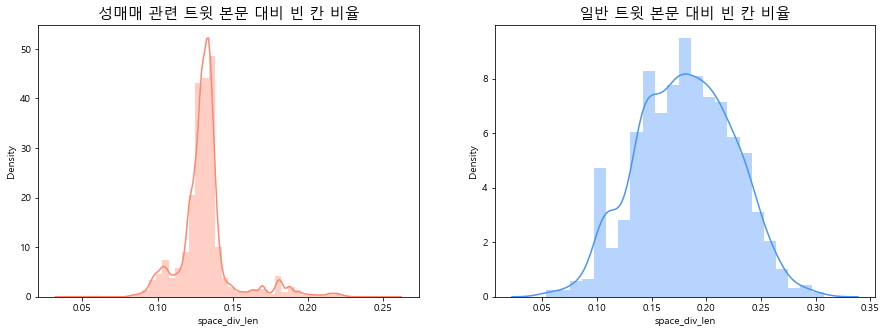

In [69]:
fig = plt.figure(figsize=(15,5))

area01 = fig.add_subplot(1, 2, 1)
area01.set_title('성매매 관련 트윗 본문 대비 빈 칸 비율', fontdict={'fontsize':15})

area02 = fig.add_subplot(1, 2, 2)
area02.set_title('일반 트윗 본문 대비 빈 칸 비율', fontdict={'fontsize':15})

sns.distplot(df[df['y']==1]['space_div_len'], color='#FF8770', kde=True, ax = area01)
sns.distplot(df[df['y']==0]['space_div_len'], color='#4994FC', kde=True, ax = area02)

Text(0.5, 1.0, '본문 대비 빈 칸 비율')

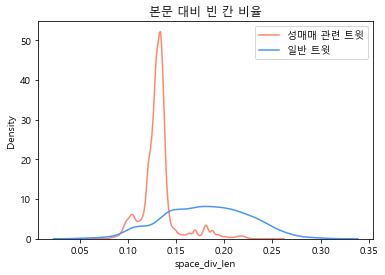

In [141]:
sns.kdeplot(df[df['y']==1]['space_div_len'], color='#FF8770')
sns.kdeplot(df[df['y']==0]['space_div_len'], color='#4994FC')
plt.legend(['성매매 관련 트윗','일반 트윗'])
plt.title('본문 대비 빈 칸 비율')

C:\Users\YUHA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\YUHA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


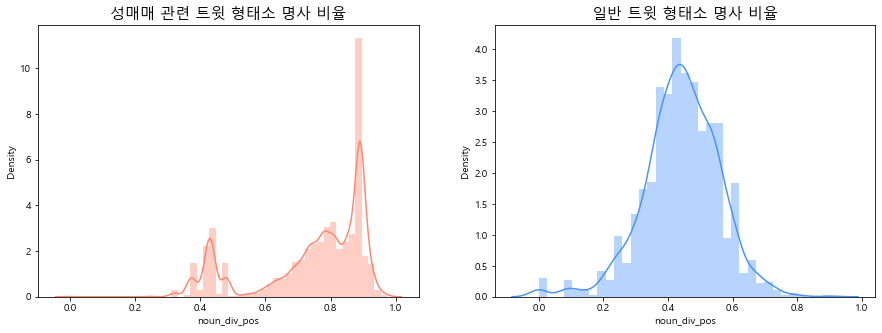

In [68]:
fig = plt.figure(figsize=(15,5))

area01 = fig.add_subplot(1, 2, 1)
area01.set_title('성매매 관련 트윗 형태소 명사 비율', fontdict={'fontsize':15})

area02 = fig.add_subplot(1, 2, 2)
area02.set_title('일반 트윗 형태소 명사 비율', fontdict={'fontsize':15})

sns.distplot(df[df['y']==1]['noun_div_pos'], color='#FF8770', kde=True, ax = area01)
sns.distplot(df[df['y']==0]['noun_div_pos'], color='#4994FC', kde=True, ax = area02)

Text(0.5, 1.0, '형태소 명사 비율')

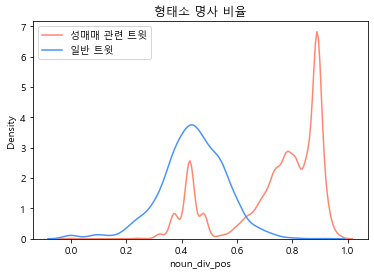

In [140]:
sns.kdeplot(df[df['y']==1]['noun_div_pos'], color='#FF8770')
sns.kdeplot(df[df['y']==0]['noun_div_pos'], color='#4994FC')
plt.legend(['성매매 관련 트윗','일반 트윗'])
plt.title('형태소 명사 비율')

C:\Users\YUHA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\YUHA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


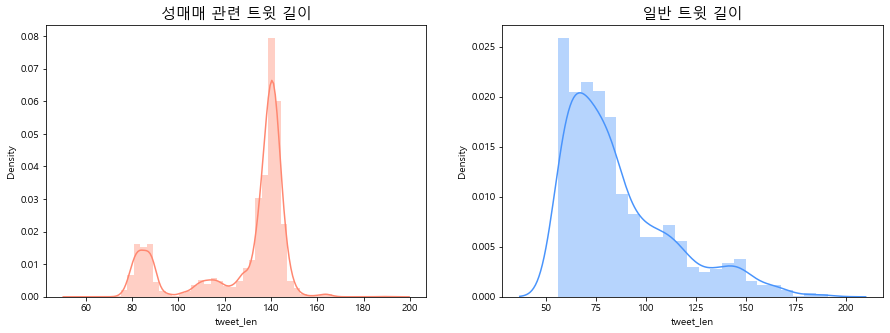

In [72]:
fig = plt.figure(figsize=(15,5))

area01 = fig.add_subplot(1, 2, 1)
area01.set_title('성매매 관련 트윗 길이', fontdict={'fontsize':15})

area02 = fig.add_subplot(1, 2, 2)
area02.set_title('일반 트윗 길이', fontdict={'fontsize':15})

sns.distplot(df[df['y']==1]['tweet_len'], color='#FF8770', kde=True, ax = area01)
sns.distplot(df[df['y']==0]['tweet_len'], color='#4994FC', kde=True, ax = area02)

Text(0.5, 1.0, '트윗 길이')

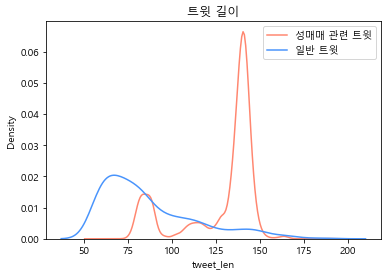

In [139]:
sns.kdeplot(df[df['y']==1]['tweet_len'], color='#FF8770')
sns.kdeplot(df[df['y']==0]['tweet_len'], color='#4994FC')
plt.legend(['성매매 관련 트윗','일반 트윗'])
plt.title('트윗 길이')

### 일반 검색어 트윗 분석
트렌드 검색어: '더블헤더', '미세먼지', '보건실침대', '수업시간몰폰', '어버이날', '피어리스', '허벅지씨름', '호흡곤란'

In [90]:
#트렌드 검색어 트윗
trend = ['더블헤더', '미세먼지', '보건실침대', '수업시간몰폰', '어버이날', '피어리스', '허벅지씨름', '호흡곤란']

a=pd.DataFrame()
for t in trend:
    b=df[df['search_word']==t]
    a=pd.concat([a,b])

In [129]:
#성매매 광고 검색어 트윗
kword = ['란제리노래방', '란제리룸', '레깅스룸', '룸야구장', '섹스파트너', '섹파', '셔츠룸', '애인대행',
       '애인모드', '오피걸', '조건만남', '출장대행', '출장샵', '출장아가씨', '출장안마', '콜걸', '풀싸롱',
       '사까시', '역립', '질싸', '펠라', '핸플']
c=pd.DataFrame()
for k in kword:
    d=df[df['search_word']==k]
    c=pd.concat([c,d])

In [91]:
#조회수를 높이기 위해 트렌드 검색어를 포함한 성매매 광고글들이 있음
a['y'].value_counts()

0    1416
1     404
Name: y, dtype: int64

In [130]:
c['y'].value_counts()

1    211464
Name: y, dtype: int64

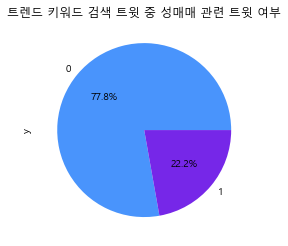

In [92]:
a['y'].value_counts().plot(kind='pie',autopct='%1.1f%%', colors=['#4994FC', '#7627E8'], title='트렌드 키워드 검색 트윗 중 성매매 관련 트윗 여부')

In [102]:
a.reset_index(drop=True, inplace=True)

In [103]:
#time중 hour만 추출
hour0a=[a['time'][i].hour for i in range(len(a)) if a['y'][i]==0]
hour1a=[a['time'][i].hour for i in range(len(a)) if a['y'][i]==1]

C:\Users\YUHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\YUHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\YUHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\YUHA\anaconda3\lib\site-p

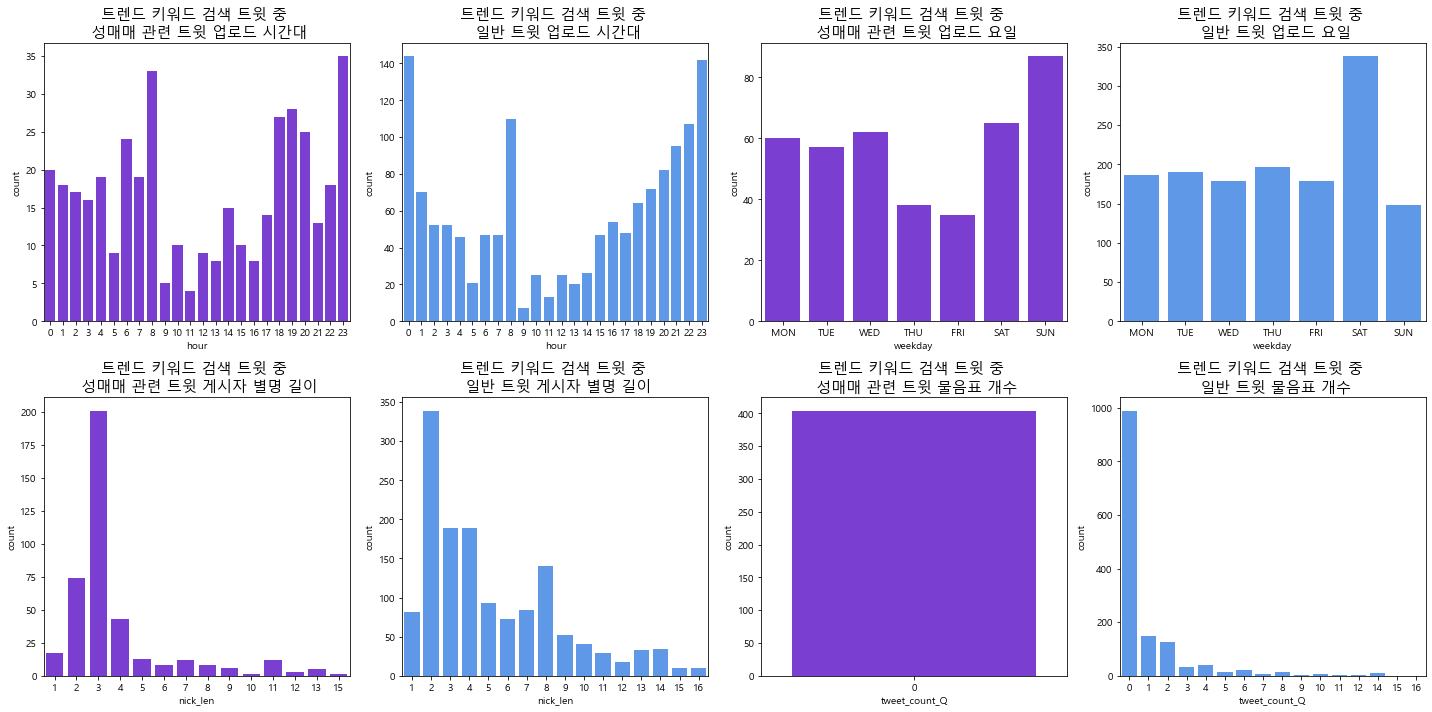

In [114]:
fig = plt.figure(figsize=(20,10))

area01 = fig.add_subplot(2, 4, 1)
area01.set_xticks(range(0,24,1))
area01.set_xlabel('hour')
area01.set_title('트렌드 키워드 검색 트윗 중 \n 성매매 관련 트윗 업로드 시간대', fontdict={'fontsize':15})

area02 = fig.add_subplot(2, 4, 2)
area02.set_xticks(range(0,24,1))
area02.set_xlabel('hour')
area02.set_title('트렌드 키워드 검색 트윗 중 \n 일반 트윗 업로드 시간대', fontdict={'fontsize':15})

area03 = fig.add_subplot(2, 4, 3)
area03.set_title('트렌드 키워드 검색 트윗 중 \n 성매매 관련 트윗 업로드 요일', fontdict={'fontsize':15})

area04 = fig.add_subplot(2, 4, 4)
area04.set_title('트렌드 키워드 검색 트윗 중 \n 일반 트윗 업로드 요일', fontdict={'fontsize':15})

area05 = fig.add_subplot(2, 4, 5)
area05.set_title('트렌드 키워드 검색 트윗 중 \n 성매매 관련 트윗 게시자 별명 길이', fontdict={'fontsize':15})

area06 = fig.add_subplot(2, 4, 6)
area06.set_title('트렌드 키워드 검색 트윗 중 \n 일반 트윗 게시자 별명 길이', fontdict={'fontsize':15})

area07 = fig.add_subplot(2, 4, 7)
area07.set_title('트렌드 키워드 검색 트윗 중 \n 성매매 관련 트윗 물음표 개수', fontdict={'fontsize':15})

area08 = fig.add_subplot(2, 4, 8)
area08.set_title('트렌드 키워드 검색 트윗 중 \n 일반 트윗 물음표 개수', fontdict={'fontsize':15})


sns.countplot(hour1a, ax=area01, color='#7627E8')
sns.countplot(hour0a, ax=area02, color='#4994FC')
sns.countplot(a[a['y']==1]['weekday'], ax=area03, color='#7627E8')
sns.countplot(a[a['y']==0]['weekday'], ax=area04, color='#4994FC')
sns.countplot(a[a['y']==1]['nick_len'], ax=area05, color='#7627E8')
sns.countplot(a[a['y']==0]['nick_len'], ax=area06, color='#4994FC')
sns.countplot(a[a['y']==1]['tweet_count_Q'], ax=area07, color='#7627E8')
sns.countplot(a[a['y']==0]['tweet_count_Q'], ax=area08, color='#4994FC')

plt.tight_layout()

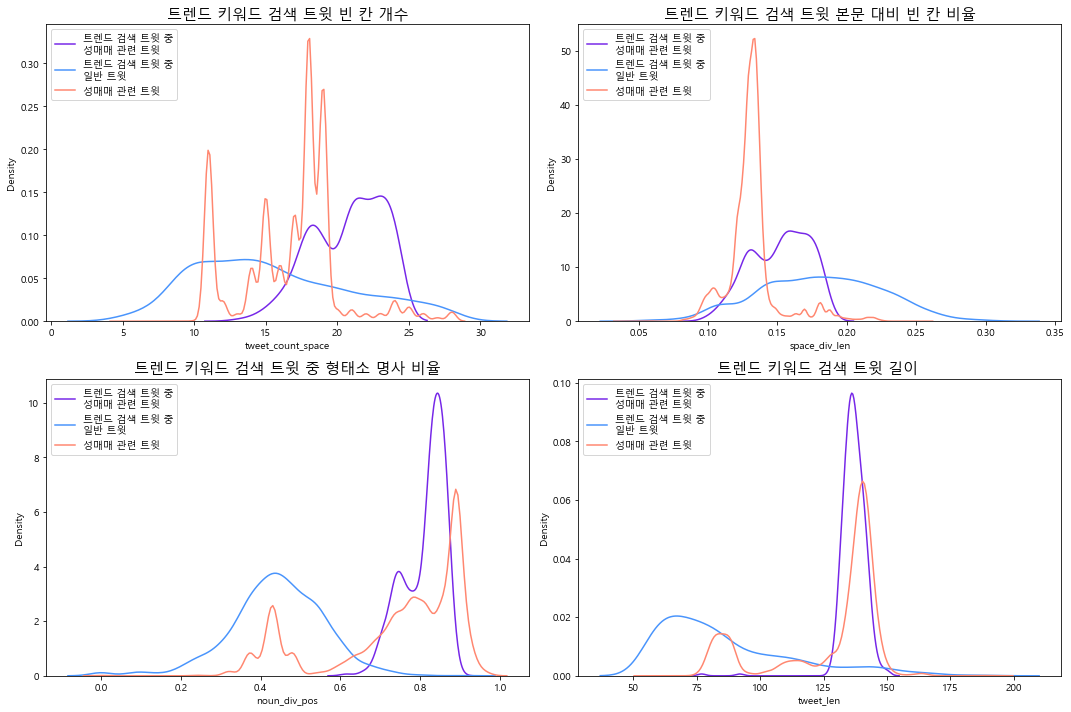

In [162]:
fig = plt.figure(figsize=(15,10))

area01=fig.add_subplot(2, 2, 1)
area01.set_title('트렌드 키워드 검색 트윗 빈 칸 개수', fontdict={'fontsize':15})
area02=fig.add_subplot(2, 2, 2)
area02.set_title('트렌드 키워드 검색 트윗 본문 대비 빈 칸 비율', fontdict={'fontsize':15})
area03=fig.add_subplot(2, 2, 3)
area03.set_title('트렌드 키워드 검색 트윗 중 형태소 명사 비율', fontdict={'fontsize':15})
area04=fig.add_subplot(2, 2, 4)
area04.set_title('트렌드 키워드 검색 트윗 길이 ', fontdict={'fontsize':15})

sns.kdeplot(a[a['y']==1]['tweet_count_space'], color='#7627E8', ax=area01)
sns.kdeplot(a[a['y']==0]['tweet_count_space'], color='#4994FC', ax=area01)
sns.kdeplot(c['tweet_count_space'], color='#FF8770', ax=area01)
area01.legend(['트렌드 검색 트윗 중\n성매매 관련 트윗','트렌드 검색 트윗 중\n일반 트윗','성매매 관련 트윗'], loc='upper left')

sns.kdeplot(a[a['y']==1]['space_div_len'], color='#7627E8', ax=area02)
sns.kdeplot(a[a['y']==0]['space_div_len'], color='#4994FC', ax=area02)
sns.kdeplot(c['space_div_len'], color='#FF8770', ax=area02)
area02.legend(['트렌드 검색 트윗 중\n성매매 관련 트윗','트렌드 검색 트윗 중\n일반 트윗','성매매 관련 트윗'], loc='upper left')

sns.kdeplot(a[a['y']==1]['noun_div_pos'], color='#7627E8', ax=area03)
sns.kdeplot(a[a['y']==0]['noun_div_pos'], color='#4994FC', ax=area03)
sns.kdeplot(c['noun_div_pos'], color='#FF8770', ax=area03)
area03.legend(['트렌드 검색 트윗 중\n성매매 관련 트윗','트렌드 검색 트윗 중\n일반 트윗','성매매 관련 트윗'], loc='upper left')

sns.kdeplot(a[a['y']==1]['tweet_len'], color='#7627E8', ax=area04)
sns.kdeplot(a[a['y']==0]['tweet_len'], color='#4994FC', ax=area04)
sns.kdeplot(c['tweet_len'], color='#FF8770', ax=area04)
area04.legend(['트렌드 검색 트윗 중\n성매매 관련 트윗','트렌드 검색 트윗 중\n일반 트윗','성매매 관련 트윗'], loc='upper left')

plt.tight_layout()

In [180]:
df.groupby(df['search_word']).size()

search_word
더블헤더         19
란제리노래방      500
란제리룸        807
레깅스룸       1252
룸야구장        196
미세먼지        549
보건실침대         3
사까시         433
섹스파트너      8227
섹파        25126
셔츠룸        2661
수업시간몰폰        2
애인대행      39851
애인모드        243
어버이날       1129
역립          169
오피걸       18162
조건만남      23921
질싸          473
출장대행          9
출장샵       23839
출장아가씨      5790
출장안마      28523
콜걸        27520
펠라         1893
풀싸롱         679
피어리스         48
핸플         1190
허벅지씨름         4
호흡곤란         66
dtype: int64